In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
X1 = np.array([[-1, 1, -1],[1, -1, 1],[1, -1, 1], [-1, 1, -1]])
X2 = np.array([[-1, 1, -1], [1, -1, 1], [1, -1, 1], [1, -1, 1]])
X3 = np.array([[1, -1, 1], [-1, 1, -1], [-1, -1, -1], [-1, 1, -1]])
X4 = np.array([[1, -1, -1], [-1, 1, 1], [-1, 1, 1], [1, -1, -1]])

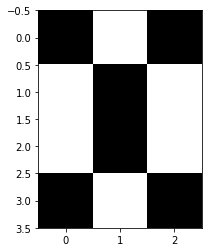

In [ ]:
plt.imshow(X1,cmap='gray')


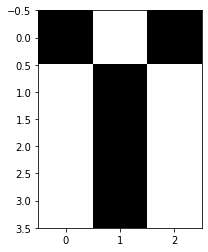

In [ ]:
plt.imshow(X2,cmap='gray')


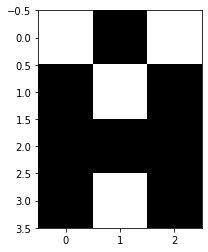

In [ ]:
plt.imshow(X3,cmap='gray')


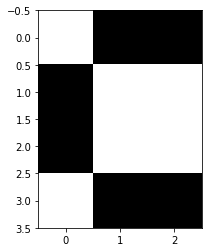

In [ ]:
plt.imshow(X4,cmap='gray')

>Hamming Distance

In [ ]:
def Hamming(X1,X2):
  return (np.size(X1) - (np.dot(X1.reshape(1,np.size(X1)),X2.reshape(np.size(X2),1)) +
                         np.size(X1) )/2)[0][0]

In [ ]:
X = [X1.reshape(1,12),X2.reshape(1,12),X3.reshape(1,12),X4.reshape(1,12)]
H = np.zeros((4,4))
for i in range(4):
  for j in range(4):
    H[i,j] = Hamming(X[i],X[j])
print(H)

[[ 0.  3.  8.  8.]
 [ 3.  0. 11.  7.]
 [ 8. 11.  0.  6.]
 [ 8.  7.  6.  0.]]


>Part 2
>>Matrix Weights and bias

In [ ]:
Exemplars = np.reshape(X,(4,12))
W = np.array(Exemplars)/2
B = np.size(X1) / 2
print('Weights Matrix = \n',W)
print('Bias = ',B)

Weights Matrix = 
 [[-0.5  0.5 -0.5  0.5 -0.5  0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5]
 [-0.5  0.5 -0.5  0.5 -0.5  0.5  0.5 -0.5  0.5  0.5 -0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5  0.5 -0.5 -0.5 -0.5 -0.5 -0.5  0.5 -0.5]
 [ 0.5 -0.5 -0.5 -0.5  0.5  0.5 -0.5  0.5  0.5  0.5 -0.5 -0.5]]
Bias =  6.0


>Part 3

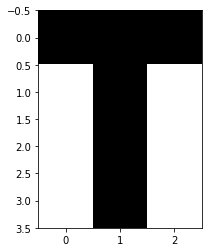

In [ ]:
Input = np.array([[-1, -1, -1],[1, -1, 1],[1, -1, 1], [1, -1, 1]])
plt.imshow(Input, cmap='gray')

In [ ]:
d = Input.reshape(1,12)
U = np.dot(W,d.T) + B

In [ ]:
Maxnet_weights = np.array([[1,-0.2,-0.2,-0.2],
                 [-0.2,1,-0.2,-0.2],
                 [-0.2,-0.2,1,-0.2],
                 [-0.2,-0.2,-0.2,1],])

In [ ]:
def maxnet(X,W):  
  X1 = X.copy()
  W = W.copy()
  steps = [] # To determine the steps of the algorithm
  while True: 
      Out = [] 
      C = 0
      net = np.dot(X1,W) 
      for i in range(W.shape[0]):
        Y = max(0,net[0,i])
        if Y == 0:
          C = C + 1
        Out.append(Y) 
      X1 = np.array(Out)
      X1 = np.reshape(X1,(1,W.shape[0]))
      steps.append(Out) 
      if C == W.shape[0] - 1:
        last = np.array(steps[len(steps)-1]) # The last step of the algorithm (Final Output)
        break
  return pd.DataFrame(steps), X[0,(np.where(last>0))[0]][0]
  

In [ ]:
steps, Output = maxnet(U.T,Maxnet_weights)

In [ ]:
steps

,0,1,2,3
0,4.20,7.800,0,1.8
1,2.28,6.600,0,0.0
2,0.96,6.144,0,0.0
3,0.00,5.952,0,0.0


In [ ]:
Output

11.0

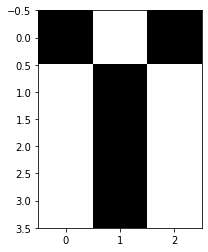

In [ ]:
plt.imshow(Exemplars[1].reshape(4,3), cmap='gray')